In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/prabin/Machine_learning_study/Simple_linear_regression/height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


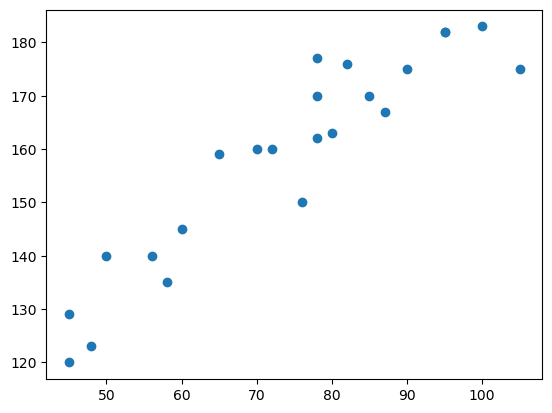

In [10]:
# scatter plot
plt.scatter(df['Weight'],df['Height'])

Text(0, 0.5, 'Height')

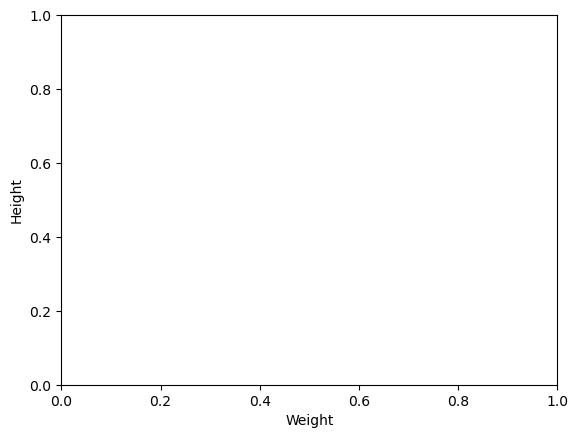

In [13]:
plt.xlabel("Weight")
plt.ylabel("Height")

In [14]:
# finding correllation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


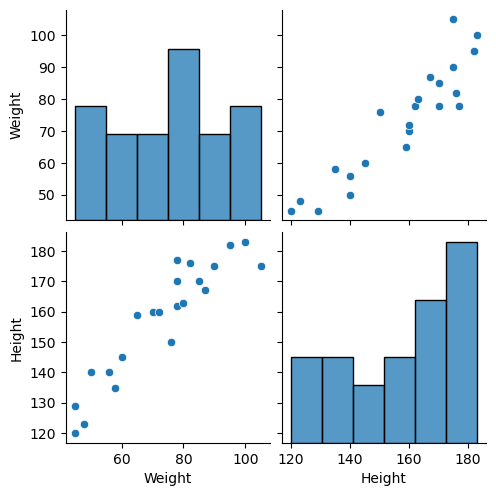

In [16]:
## seaborn visualisation

sns.pairplot(df)

In [23]:
## dividing dependent and independent features

X  = df[["Weight"]] ## independent features must be in data frame or 2 dimensional array | put double square bracket for framing the data
Y = df["Height"] ## this can be in series 

In [24]:
np.array(X).shape

(23, 1)

In [25]:
np.array(Y).shape

(23,)

In [28]:
## train and test

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [29]:
X_train.shape

(17, 1)

In [30]:
X_test.shape

(6, 1)

In [43]:
## Standardisation

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_test

array([[ 78.],
       [ 78.],
       [ 45.],
       [ 95.],
       [ 65.],
       [105.]])

In [47]:
## Applying Linear Regression
regression = LinearRegression()
regression.fit(X_train,Y_train)


LinearRegression()

In [52]:
print("coefficient :" , regression.coef_)
print("Intercept :" , regression.intercept_)

coefficient : [17.2982057]
Intercept : 156.47058823529412


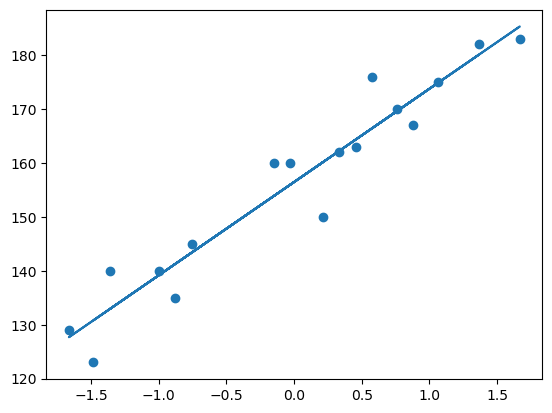

In [57]:
## plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train, regression.predict(X_train))

In [59]:
## prediction for test data
Y_pred = regression.predict(X_test) 

In [66]:
## performance metrices
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1886933.5397307768
1336.131231274159
1373.6569949338798


In [68]:
score = r2_score(Y_test,Y_pred)
print(score)

-4335.39370764813


In [69]:
## OLS Linear Regression
import statsmodels.api as sm

In [74]:
model = sm.OLS(Y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[1349.26004494 1349.26004494  778.4192567  1643.32954191 1124.38337078
 1816.31159896]


In [77]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 30 Nov 2024   Prob (F-statistic):                       0.664
Time:                        11:44:46   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [80]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

array([1401.94139895])